In [1]:
import glob, os, sys
import numpy as np
import pandas as pd
import xarray as xr

import iris

from icenet2.data.processors.cmip import IceNetCMIPPreProcessor


2022-05-18 15:46:43.710785: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
    
os.getcwd()

'/home/jambyr/code/ai-lab/icenet/IceNet-Pipeline'

In [3]:
cmip_sic = IceNetCMIPPreProcessor(
    "MRI-ESM2-0", "r1i1p1f1",
    ["siconca"],
    [],
    "cmip_lttest",
    pd.date_range("1990-1-1", "1990-8-31"),
    pd.date_range("1990-10-1", "1990-10-30"),
    [],
    linear_trends=["siconca"],
    linear_trend_days=30,
    north=True,
    south=False,
    update_key="siconca.{}.{}".format("MRI-ESM2-0", "r1i1p1f1"),
)
cmip_sic.init_source_data(
    lag_days=3,
    lead_days=30,
)
#cmip_sic.process()

In [4]:
da = cmip_sic._open_dataarray_from_files("siconca")

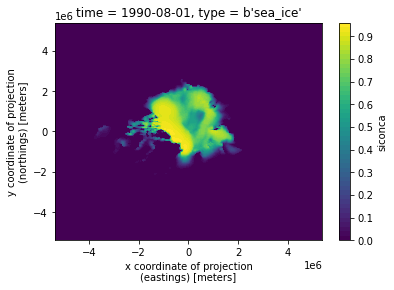

In [5]:
xr.plot.contourf(da.isel(time=212), levels=50)

In [6]:
da.isel(time=212).max().compute()

<xarray.DataArray 'siconca' ()>
array(0.95493203, dtype=float32)
Coordinates:
    time     datetime64[ns] 1990-08-01
    type     |S7 b'sea_ice'

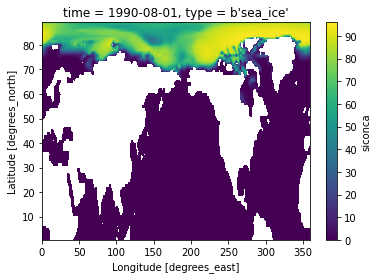

In [7]:
ds = xr.open_dataset("data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/1990/latlon_1990_08_01.nc")
xr.plot.contourf(ds.isel(time=0).siconca, levels=100)

## Atmos vars

In [22]:
cmip = IceNetCMIPPreProcessor(
    "MRI-ESM2-0", "r1i1p1f1",
    ["uas", "vas"],
    ["tas", "ta500", "tos", "psl", "zg500", "zg250", "rsds", "rlds", "hus1000"],
    "cmip_lttest",
    pd.date_range("1990-1-1", "1990-8-31"),
    pd.date_range("1990-10-1", "1990-10-30"),
    [],
    linear_trends=tuple(),
    north=True,
    south=False,
)
# ./data/cmip6/north/vas/MRI-ESM2-0.r2i1p1f1/2050/latlon_2050_01_22.nc
cmip.init_source_data(
    lag_days=3,
)


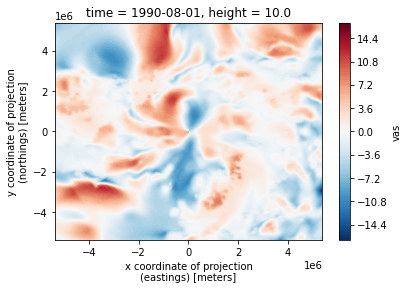

In [25]:
da = cmip._open_dataarray_from_files("vas")
xr.plot.contourf(da.isel(time=212), levels=100)

In [ ]:
da.max().compute()

In [ ]:
datafile = "data/cmip6.MRI-ESM2-0.r1i1p1f1/north/hus1000/1990/1990_08_01.nc"
ds = xr.open_dataset(datafile)
ds

In [ ]:
xr.plot.contourf(ds.isel(time=0).hus, levels=100)

In [ ]:
re_cube = iris.load_cube("data/cmip6.MRI-ESM2-0.r1i1p1f1/north/siconca/ice_conc_nh_ease2-250_cdr-v2p0_197901021200.nc", 'sea_ice_area_fraction')
re_cube.coord('projection_y_coordinate').convert_units('meters')
re_cube.coord('projection_x_coordinate').convert_units('meters')

In [ ]:
cube = iris.load_cube(datafile)
cs = re_cube.coord_system().ellipsoid

for coord in ['longitude', 'latitude']:
    cube.coord(coord).coord_system = cs

In [ ]:
cube